In [1]:
%matplotlib inline

In [2]:
import seaborn as sns
import numpy as np
import scipy
import pandas as pd

# timeseries comparison

We can compare pairs of time series (e.g. rates) as long as the sampling times for the two series are (roughly) the same. Below we make two almost identical series `A` and `B`, and look at their correlation. Even though we corrupt B with some noise the correlation is still pretty high.

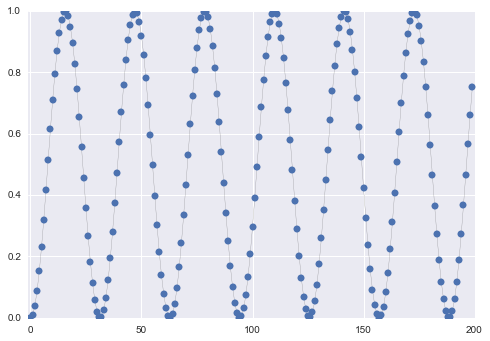

In [3]:
A = [np.sin(x)**2 for x in np.arange(0,20,0.1)]
sns.tsplot(A,interpolate=False)

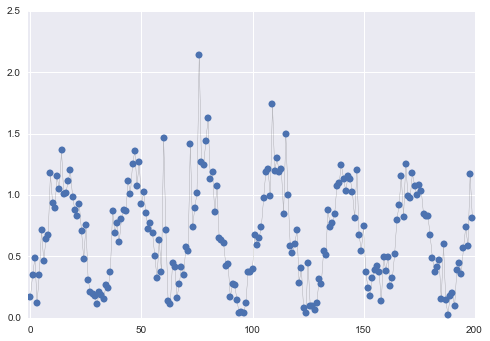

In [4]:
B = [np.sin(x)**2 + np.random.exponential(0.2)  for x in np.arange(0,20,0.1)]
sns.tsplot(B,interpolate=False)

In [5]:
phi, p = scipy.stats.pearsonr(A,B)
print phi

0.875330184879


The more we corrupt B with noise, the lower the correlation:

In [6]:
genB = lambda r: [np.sin(x)**2 + np.random.exponential(r)  for x in np.arange(0,20,0.1)]

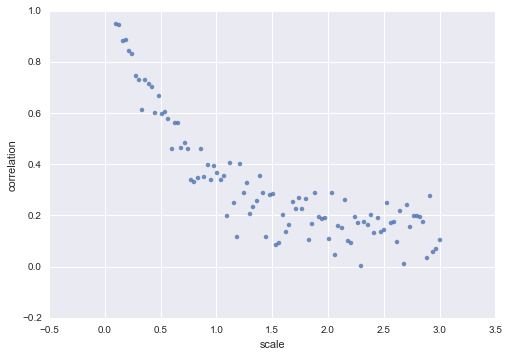

In [7]:
corruption = np.linspace(0.1, 3, 100)
d = pd.DataFrame({"scale": corruption, "correlation": [scipy.stats.pearsonr(A,genB(r))[0] for r in corruption]})
sns.regplot("scale","correlation",d,fit_reg=False)

# distribution comparison

If we're interested in comparing how a variable is distributed in two different streams, we can compare their histograms using a number known as the "Kullback Leibler divergence", normally referred to as D_KL. Let's make a histogram P and compare it to another histogram Q. 

In [8]:
k = 10
categories = range(k)

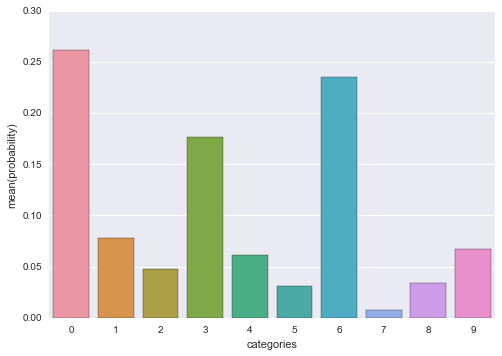

In [9]:
P = np.random.dirichlet([1 for i in categories])
sns.barplot(x="categories", y="probability", data=pd.DataFrame({"probability":P, "categories":categories}))

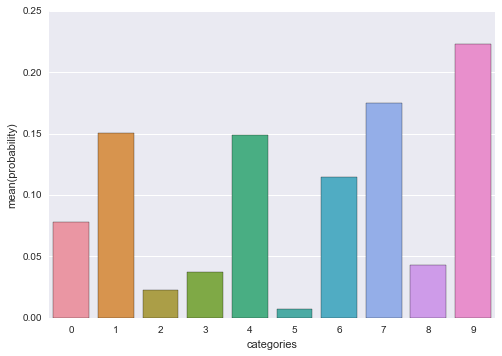

In [10]:
Q = np.random.dirichlet([1 for i in categories])
sns.barplot(x="categories", y="probability", data=pd.DataFrame({"probability":Q, "categories":categories}))

In [11]:
DKL = lambda p,q : sum(p[i] * np.log(p[i]/q[i]) for i in range(len(p)))

Note that the Kullback Leibler Divergence IS NOT A DISTANCE! It's not symmetric, amongst other things. We can use the symmetrised DKL, which is just the sum. This still isn't a distance, but it's symmetric. 

In [12]:
DKL(P,Q), DKL(Q,P), DKL(P,Q)+DKL(Q,P)

(0.62069841457816355, 0.79901336694740754, 1.4197117815255711)

if we make a distribution that is markedly different, we should see a higher divergence

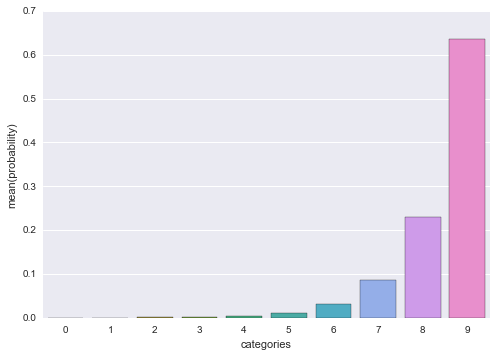

In [13]:
R = np.random.dirichlet([np.exp(i+1) for i in categories])
sns.barplot(x="categories", y="probability", data=pd.DataFrame({"probability":R, "categories":categories}))

In [15]:
DKL(P,R)+DKL(R,P), DKL(R,Q)+DKL(Q,R)

(6.4278148688575394, 3.3320797991550637)